# Estatística com Python: probabilidade e amostragem

## preparando o ambiente 

os dados utilizados nesse notebook foram retirado do seguinte link

https://www.ibge.gov.br/estatisticas/sociais/populacao/19897-sintese-de-indicadores-pnad2.html?=&t=microdados

Os seguintes tratamentos foram realizados nos dados originais:

       Foram eliminados os registros onde a Renda era inválida (999 999 999 999);
       Foram eliminados os registros onde a Renda era missing;
       Foram considerados somente os registros das Pessoas de Referência de cada domicílio (responsável pelo domicílio).

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv(r'C:\Users\dougl\OneDrive\Área de Trabalho\data science\dados\curso de estatistica\dados.csv')

In [3]:
dados.head()
# a seguir colocarei a legenda dos códigos do dataset

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

## distribuição binomial 

In [4]:
from scipy.special import comb

In [5]:
combinacoes = comb(60,6)
combinacoes
# utilizando como exemplo a chance de ganhar na mega-sena com um unico bilhete

50063860.0

In [6]:
probabilidade = 1/combinacoes
probabilidade

1.997448858318156e-08

In [7]:
probabilidade = 1 / combinacoes
print('%0.15f' % probabilidade)
# utilizando uma notação diferente para melhor visualização

0.000000019974489


## exemplo resolvido - distribuição binomial 

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

In [8]:
n = 10
# numero de ensaios 

In [9]:
numero_de_alternativas_por_questao = 3
p = 1 / numero_de_alternativas_por_questao
p
# probabilidade de sucesso 

0.3333333333333333

In [10]:
q = 1 - p 
q
# probabilidade de fracasso 

0.6666666666666667

In [11]:
k = 5
k
# numero de eventos em que se deseja obter sucesso


5

In [12]:
probabilidade = (comb(n , k) * (p ** k) * (q **(n - k)))
print('%0.8f' % probabilidade)
# probabilidade dele acertar 5 questões

0.13656455


In [13]:
from scipy.stats import binom
# calcular a mesma probabilidade, mas agora utilizando as bibliotecas do python

In [14]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)
# calcular a probabilidade de acertar as 5 questões

0.13656455


### agora calculando a probabilidade dele passar
para passar ele precisa acertar 5 ,6 ,7 ,8 ,9 ou 10

In [15]:
binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)

0.21312808006909492

In [16]:
binom.pmf([5, 6, 7, 8, 9, 10], n, p).sum()
# utilizando outra forma através da soma

0.21312808006909492

In [17]:
1 - binom.cdf(4, n, p)


0.21312808006909523

In [18]:
binom.sf(4, n, p)

0.21312808006909525

## exemplo resolvido II - distribuição binomial 

Temos uma cidade do interior que realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última, a proporção de participantes do sexo feminino foi de 60% e o total foi de 30 equipes com 12 integrantes cada uma.

Com as informações acima, deveremos responder quantas equipes são formadas por 8 mulheres.

In [19]:
p = 0.6
p

0.6

In [20]:
n = 12
n

12

In [21]:
k = 8
k

8

In [22]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.21284094


In [23]:
equipes = 30 * probabilidade
equipes

6.3852281856

## exemplo resolvido III - distribuição de poisson 

distribuição de poisson: Essa Distribuição é empregada para descrever número de ocorrências em um intervalo de tempo ou espaço específico, que nos permite contabilizar o sucesso, mas é impossível contar os fracassos

Um restaurante recebe em média 20 pedidos por hora, e deveremos descobrir qual a chance do restaurante receber 15 pedidos em uma determinada hora escolhida ao acaso.

In [24]:
import numpy as np

In [25]:
np.e

2.718281828459045

In [26]:
media = 20
media
# numero médio de ocorrência por hora 

20

In [27]:
k = 15
k
# número de ocorrências que queremos obter no periodo

15

In [28]:
probabilidade = ((np.e ** (-media)) * (media ** k)) / (np.math.factorial(k))
print('%0.8f' % probabilidade)
# formúla de poisson

0.05164885


In [29]:
from scipy.stats import poisson

In [30]:
probabilidade = poisson.pmf(k, media)
print('%0.8f' % probabilidade)
# calculando utilizando outra biblioteca 

0.05164885


## exemplo resolvido IV - distribuição normal 

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

A - probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

B - probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

C - probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

In [31]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada
# tabela padronizada de probabilidade

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


resolução de A

In [32]:
media = 1.7
media

1.7

In [33]:
desvio_padrao = 0.1
desvio_padrao

0.1

In [34]:
Z = (1.8 - media)/ desvio_padrao
Z

1.0000000000000009

In [35]:
probabilidade = 0.8413
# utilizando a tabela obtemos esse valor 

In [36]:
from scipy.stats import norm

In [37]:
norm.cdf(Z)
# utilizando o scipy para realizar o cálculo da probabilidade

0.8413447460685431

resolução de B

In [38]:
probabilidade = 0.8413 - 0.5
probabilidade
# como a distancia de 1.7 é a mesma de 1.8 pra 1.6 utilizaremos o mesmo calculo e depois diminuindo a probabilidade de 50%

0.34130000000000005

In [39]:
probabilidade = (0.8413 - 0.5) * 2
probabilidade
# como a distância de 1.7 é a mesma tanto pra 1.6 pra 1.8 a gente utiliza o resultado (0.8413 - 0.5) e multiplica por 2 

0.6826000000000001

In [40]:
Z_inferior = (1.6 - media) / desvio_padrao
round(Z_inferior, 2)

-1.0

In [41]:
Z_superior = (1.8 - media) / desvio_padrao
round(Z_superior, 2)

1.0

In [42]:
probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade
# utilizando o scipy

0.6826894921370857

resolvendo C

In [43]:
Z = (1.9 - media) / desvio_padrao
Z

1.9999999999999996

In [44]:
probabilidade = 1 - 0.9767
probabilidade
# utilizando o valor encontrado na tabela

0.023299999999999987

In [45]:
probabilidade = 1 - norm.cdf(Z)
probabilidade
# utilizando o scipy

0.02275013194817921

In [46]:
probabilidade = norm.cdf(-Z)
probabilidade
# ao utilizar o '-Z' pegamos o dado oposto no gráfico sendo exatamente o que buscamos em C

0.022750131948179216

## amostragem

para realizarmos estudos envolvendo populações, é necessario selecionar uma parte dessa populaçao que seja representativa em relação ao todo, essa parte selecionada é a amostragem e existem diversos tipos de amostragens 

## amostragem aleatória simples

In [47]:
dados.shape[0]

76840

In [48]:
dados.Renda.mean()

2000.3831988547631

In [49]:
amostra = dados.sample(n = 100,random_state = 101)

In [50]:
amostra.shape[0]

100

In [51]:
amostra.Renda.mean()

2150.85

In [52]:
dados.Sexo.value_counts(normalize = True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [53]:
amostra.Sexo.value_counts(normalize = True)

0    0.69
1    0.31
Name: Sexo, dtype: float64

## estimação

## teorema do limite central

## exemplo resolvido IV - teorema do limite central

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

In [54]:
n = 2000
total_de_amostras = 1500 

In [55]:
amostras = pd.DataFrame()
amostras

""


In [56]:
for i in range(total_de_amostras):
  _ = dados.Idade.sample(n)
  _.index = range(0, len(_))
  amostras['Amostra_' + str(i)] = _

amostras

# criando um dataframe para realizar o teste 

C:\Users\dougl\AppData\Local\Temp/ipykernel_15656/4038110214.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['Amostra_' + str(i)] = _


,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,21,35,45,36,41,22,60,36,33,55,...,45,70,38,55,60,41,63,21,32,17
1,46,54,45,63,40,58,31,43,56,37,...,35,65,35,34,25,38,53,37,58,56
2,43,49,50,57,51,48,39,38,45,34,...,77,39,27,64,42,58,25,47,41,64
3,64,61,49,42,71,38,41,66,29,32,...,71,70,48,53,19,49,55,53,80,51
4,38,34,66,39,26,39,51,60,52,39,...,33,30,47,58,48,33,49,27,52,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,27,43,27,32,57,30,33,26,36,48,...,40,52,49,41,44,48,42,32,27,60
1996,60,25,33,36,47,66,29,54,41,46,...,37,52,44,44,53,42,38,52,52,36
1997,54,27,50,26,61,45,50,66,41,55,...,43,33,35,40,48,38,73,61,37,42
1998,24,65,53,51,59,33,69,51,41,33,...,48,53,32,61,27,34,59,25,38,57


In [57]:
amostras.mean()

Amostra_0       44.2530
Amostra_1       44.6410
Amostra_2       44.5110
Amostra_3       44.0690
Amostra_4       44.4000
                 ...   
Amostra_1495    43.5945
Amostra_1496    44.0625
Amostra_1497    44.7970
Amostra_1498    44.3595
Amostra_1499    44.2825
Length: 1500, dtype: float64

<AxesSubplot:>

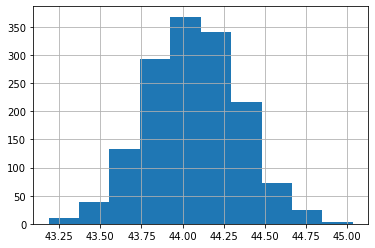

In [58]:
amostras.mean().hist()

In [59]:
dados.Idade.mean()

44.07142113482561

In [60]:
amostras.mean().mean()

44.067215999999945

In [61]:
dados.Idade.std()/ np.sqrt(n)

0.2790743302740527

retornando ao problema

In [62]:
media_amostra = 5050
media_amostra

5050

In [63]:
significancia = 0.05
significancia

0.05

In [64]:
confianca = 1 - significancia
confianca

0.95

In [65]:
tabela_normal_padronizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


In [66]:
z = norm.ppf(0.975)
z

1.959963984540054

In [67]:
desvio_padrao = 150
desvio_padrao

150

In [68]:
n = 20
n

20

In [69]:
raiz_de_n = np.sqrt(n)
raiz_de_n

4.47213595499958

In [70]:
sigma = desvio_padrao / raiz_de_n
sigma

33.54101966249684

In [71]:
e = z * sigma
e

65.73919054324361

In [72]:
intervalo = (
    media_amostra - e,
    media_amostra + e
)
intervalo

(4984.260809456757, 5115.739190543243)

In [73]:
norm.interval(alpha = 0.95, loc = media_amostra, scale = sigma)

(4984.260809456757, 5115.739190543243)

## calculando tamanho da amostra

## exemplo V - váriaveis quantitativas e populações infinitas

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

In [74]:
0.95 / 2
# pelo fato de ser uma amostragem 'normal' pode se aplicar essa estimativa 

0.475

In [75]:
0.5 + 0.95 / 2

0.975

In [76]:
z = norm.ppf(0.975)
z

1.959963984540054

In [77]:
sigma = 3323.39
sigma

3323.39

In [78]:
e = 100
e

100

In [79]:
n = (z * (sigma/e))** 2
int(n.round())
# população que deve ser usada para adquirir um resultado seguro, lembrando que os esses dados são obitidos de uma população infinita

4243

## exemplo VI - população finita

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

In [80]:
n = 10000
n

10000

In [81]:
z = norm.ppf((0.5 + (0.95 / 2)))
z


1.959963984540054

In [82]:
s = 12
s

12

In [83]:
e = 5
e

5

In [84]:
n = ((z**2) * (s**2) * (n)) / (((z**2) * (s**2)) + ((e**2) * (n - 1)))
int(n.round())
# utilizando a formúla matemática

22

## exemplo VII - resumo do estudo completo

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79** e que a **média populacional** é de **R$\$$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

In [85]:
renda_5000 = dados.query('Renda <= 5000').Renda
# selecionando a series que iremos trabalhar, dentro do intervalo desejado 

In [86]:
sigma = renda_5000.std()
sigma
# desvio padrão

1082.794549030635

In [87]:
media = renda_5000.mean()
media
# calculo da média

1426.5372144947232

In [88]:
z = norm.ppf(.975)
e = 10
n = (z * (sigma / e)) ** 2
n = int(n.round())
n
# calculo do tamanho da amostra necessária

45039

In [89]:
intervalo = norm.interval(alpha = 0.95, loc = media, scale = sigma / np.sqrt(n))
intervalo
# calculando intervalo de confiança para a média

(1416.5372195108241, 1436.5372094786223)

<AxesSubplot:>

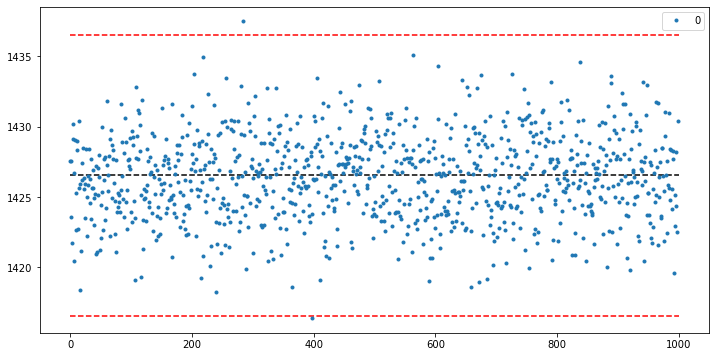

In [90]:
import matplotlib.pyplot as plt

tamanho_simulacao = 1000

medias = [renda_5000.sample(n = n).mean() for i in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = media, xmin = 0, xmax = tamanho_simulacao, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax

In [91]:
# grafico criádo para mostrar o estudo final dessas amostras e desses cálculos

## finalização


esse notebook foi baseado nas aulas da ALURA, matéria ministrada pelo professor Rodrigo Fernandes. Bom estudo 